In [97]:
import scipy.io as sio
import scipy.io.wavfile as swv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

M = sio.loadmat('K_in_9.1837_K_out_0.5102.mat', squeeze_me = True)
z = M['z']

/Users/dmitron/.local/share/virtualenvs/OscillatorSonification-WGHsqb-U/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


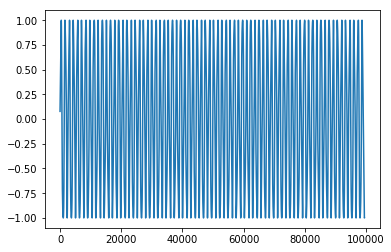

In [100]:
test_wave_copied = np.hstack([ test_wave for i in range(10) ])
test_wave = z[1,500:].astype(np.float32)
plt.plot(test_wave)
swv.write('newname.wav', 44100*4, test_wave_copied)

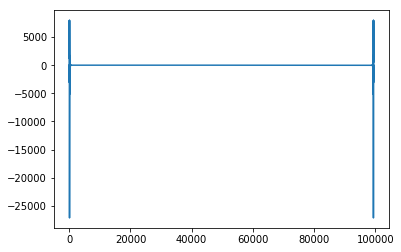

In [99]:
plt.plot(np.fft.fft(test_wave))

/Users/dmitron/.local/share/virtualenvs/OscillatorSonification-WGHsqb-U/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


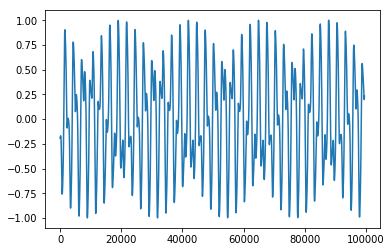

In [101]:
test_wave2 = np.sum(z[:,500:].astype(np.float32),axis=0)
test_wave2 /= max(abs(test_wave2))
plt.plot(test_wave2)
test_wave2_copied = np.hstack([ test_wave2 for i in range(10) ])
# Write the data to 'newname.wav'
swv.write('newname1.wav', 44100*4, test_wave2_copied)

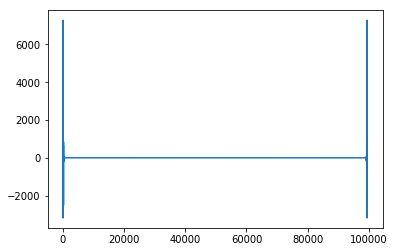

In [102]:
plt.plot(np.fft.fft(test_wave2))